# Machine Learning - Mini Project 2 - Alex Montoya Franco

## Sentiment Analysis

## Data Loading

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('Sentiment140.tenPercent.sample.tweets.tsv', delimiter='\t')

In [ ]:
data.head()

,sentiment_label,tweet_text
0,4,"@elephantbird Hey dear, Happy Friday to You A..."
1,4,Ughhh layin downnnn Waiting for zeina to co...
2,0,"@greeniebach I reckon he'll play, even if he's..."
3,0,@vaLewee I know! Saw it on the news!
4,0,very sad that http://www.fabchannel.com/ has c...


In [ ]:
data.tweet_text[0]

"@elephantbird Hey dear, Happy Friday to You  Already had your rice's bowl for lunch ?"

In [ ]:
data.tweet_text[4]

"very sad that http://www.fabchannel.com/ has closed down. One of the few web services that I've used for over 5 years "

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160000 entries, 0 to 159999
Data columns (total 2 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   sentiment_label  160000 non-null  int64 
 1   tweet_text       160000 non-null  object
dtypes: int64(1), object(1)
memory usage: 2.4+ MB


In [ ]:
data.isnull().sum()

sentiment_label    0
tweet_text         0
dtype: int64

In [ ]:
data.sentiment_label.unique()

array([4, 0])

In [ ]:
data.sentiment_label.value_counts()

4    80000
0    80000
Name: sentiment_label, dtype: int64

Data Understanding: https://www.kaggle.com/datasets/kazanova/sentiment140

(0 = negative, 4 = positive)

## Data Preprocessing

Code adapted from: https://www.kaggle.com/code/sharanharsoor/twitter-sentiment-analysis

In [ ]:
import pandas as pd
import numpy as np
import re #used as a regular expression to find particular patterns and process it
import string #used to obtain information in the string and manipulate the string overall
import warnings
import re
from wordcloud import WordCloud
# plotting
import seaborn as sns
import matplotlib.pyplot as plt
# nltk
import nltk #a natural language processing toolkit module associated in anaconda
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.tokenize import RegexpTokenizer
# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier

%matplotlib inline
warnings.filterwarnings('ignore')
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# Postive review is marked as 4, changing it to 1 and Negative review is 0.
data['sentiment_label'] = data['sentiment_label'].replace(4,1)

Selecting subset of the dataset for faster processing and analysis.

Using 60k entries and maintaining the same target ratio.

In [ ]:
data_pos = data[data['sentiment_label'] == 1]
data_neg = data[data['sentiment_label'] == 0]

data_pos = data_pos.iloc[:int(30000)]
data_neg = data_neg.iloc[:int(30000)]

sample_data = pd.concat([data_pos, data_neg])

print(len(sample_data))
sample_data.head(2)

60000


,sentiment_label,tweet_text
0,1,"@elephantbird Hey dear, Happy Friday to You A..."
1,1,Ughhh layin downnnn Waiting for zeina to co...


In [ ]:
sample_data['tweet_text'].tail()

59805    @mszjoycii jelous! we dont have hot topic here...
59806                @Cuddlepuff1  good luck with all that
59809    Survivor mode is crazy!!! ...but its not the s...
59810    @Courageous_one  Ah thats a downer about apart...
59815            @mattythorne Ouch!  Glad it got fixed up.
Name: tweet_text, dtype: object

In [ ]:
# Converting to Lower case

sample_data['tweet_text'] = sample_data['tweet_text'].str.lower()
sample_data['tweet_text'].tail()

59805    @mszjoycii jelous! we dont have hot topic here...
59806                @cuddlepuff1  good luck with all that
59809    survivor mode is crazy!!! ...but its not the s...
59810    @courageous_one  ah thats a downer about apart...
59815            @mattythorne ouch!  glad it got fixed up.
Name: tweet_text, dtype: object

In [ ]:
# Defining stopwords

stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're',
             's', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

In [ ]:
# Removing Stopwords

STOPWORDS = set(stopwordlist)

def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
    
sample_data['tweet_text'] = sample_data['tweet_text'].apply(lambda text: cleaning_stopwords(text))
sample_data['tweet_text'].tail()

59805    @mszjoycii jelous! dont hot topic yet bought s...
59806                               @cuddlepuff1 good luck
59809    survivor mode crazy!!! ...but not without frie...
59810    @courageous_one ah thats downer apartments no ...
59815                @mattythorne ouch! glad got fixed up.
Name: tweet_text, dtype: object

In [ ]:
# Removing stop words using nltk lib

#Tokenization of text
tokenizer = ToktokTokenizer() 

#Setting English stopwords
stopword_list = nltk.corpus.stopwords.words('english')

#Removing standard english stopwords like prepositions, adverbs
stop = set(stopwords.words('english'))
print("NLTK stop word lists \n")
print(stop)

#Removing the stopwords
def remove_stopwords(text, is_lower_case=True):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text

NLTK stop word lists 

{'how', "you'd", "she's", 'yours', 'ours', 'mustn', 'just', 'didn', 'his', 'd', 'her', 'himself', 're', 'were', 'don', 'by', 'wouldn', 'needn', 'themselves', 'down', 'the', 'have', 'do', 'me', 'above', 'your', 'hers', 'its', 'him', "shouldn't", 'against', 'a', 'after', 'this', 'herself', "that'll", "it's", 'now', 'wasn', 'only', "wasn't", 'hadn', 'but', 'or', 'very', 'yourselves', 'be', 'before', 'ourselves', 'doesn', 'below', 'out', 'because', 'here', "doesn't", "haven't", 'about', 'y', 'couldn', 'under', 'there', 'she', 'am', "couldn't", "weren't", 'who', 'why', "don't", 'from', 'isn', 'itself', 'was', 'of', 'all', 'should', "mustn't", 'weren', 'o', 'our', 'any', 'hasn', 'had', 'will', 'does', 've', 'we', "mightn't", 'both', 'shouldn', 'at', 'that', 'ain', 'yourself', 'up', "you'll", 'on', 'm', 'same', 'own', 'theirs', "needn't", 'than', 'and', 'ma', 'they', 'until', 's', 'nor', 'it', 'into', 'an', "won't", "you've", 'which', "hadn't", 'for', "hasn't", "isn't",

In [ ]:
sample_data['tweet_text'] = sample_data['tweet_text'].apply(remove_stopwords)
sample_data['tweet_text'].tail()

59805    @mszjoycii jelous ! dont hot topic yet bought ...
59806                               @cuddlepuff1 good luck
59809    survivor mode crazy ! ! ! ... without friends ...
59810      @courageous_one ah thats downer apartments pets
59815                 @mattythorne ouch ! glad got fixed .
Name: tweet_text, dtype: object

In [ ]:
# removing URLs

def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)

sample_data['tweet_text'] = sample_data['tweet_text'].apply(lambda x: cleaning_URLs(x))
sample_data['tweet_text'].head()

0     @elephantbird hey dear , happy friday already ...
1      ughhh layin downnnn waiting zeina cook breakfast
6                    god ur side anything possible ....
10                     video vh1 much better u tube one
14    @ ashleyltmsyf hey ashley hush hush ; hush hus...
Name: tweet_text, dtype: object

In [ ]:
# removing numbers 

def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)

sample_data['tweet_text'] = sample_data['tweet_text'].apply(lambda x: cleaning_numbers(x))
sample_data['tweet_text'].head()

0     @elephantbird hey dear , happy friday already ...
1      ughhh layin downnnn waiting zeina cook breakfast
6                    god ur side anything possible ....
10                      video vh much better u tube one
14    @ ashleyltmsyf hey ashley hush hush ; hush hus...
Name: tweet_text, dtype: object

In [ ]:
# function to removes pattern in the input text

def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for word in r:
        input_txt = re.sub(word, "", input_txt)
    return input_txt

In [ ]:
# remove twitter handles (@user)

sample_data['tweet_text'] = np.vectorize(remove_pattern)(sample_data['tweet_text'], "@[\w]*")
sample_data.head()

,sentiment_label,tweet_text
0,1,"hey dear , happy friday already rice ' bowl l..."
1,1,ughhh layin downnnn waiting zeina cook breakfast
6,1,god ur side anything possible ....
10,1,video vh much better u tube one
14,1,ashleyltmsyf hey ashley hush hush ; hush hush...


In [ ]:
# remove repeating characters
def clean_repeating_char(text):
    return re.sub(r"(.)\1\1+", r"\1\1", text)

sample_data['tweet_text'] = sample_data['tweet_text'].apply(lambda x: clean_repeating_char(x))
sample_data.head()

,sentiment_label,tweet_text
0,1,"hey dear , happy friday already rice ' bowl l..."
1,1,ughh layin downn waiting zeina cook breakfast
6,1,god ur side anything possible ..
10,1,video vh much better u tube one
14,1,ashleyltmsyf hey ashley hush hush ; hush hush...


In [ ]:
# remove special characters and punctuations

sample_data['tweet_text'] = sample_data['tweet_text'].str.replace("[^a-zA-Z#]", " ")
sample_data.head()

,sentiment_label,tweet_text
0,1,hey dear happy friday already rice bowl l...
1,1,ughh layin downn waiting zeina cook breakfast
6,1,god ur side anything possible
10,1,video vh much better u tube one
14,1,ashleyltmsyf hey ashley hush hush hush hush...


In [ ]:
# remove short words

sample_data['tweet_text'] = sample_data['tweet_text'].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))
sample_data.head()

,sentiment_label,tweet_text
0,1,dear happy friday already rice bowl lunch
1,1,ughh layin downn waiting zeina cook breakfast
6,1,side anything possible
10,1,video much better tube
14,1,ashleyltmsyf ashley hush hush hush hush video ...


In [ ]:
# Tokenizing the text

tokenizer = RegexpTokenizer(r'\w+')
sample_data['tweet_text'] = sample_data['tweet_text'].apply(tokenizer.tokenize)
sample_data['tweet_text'].head()

0     [dear, happy, friday, already, rice, bowl, lunch]
1     [ughh, layin, downn, waiting, zeina, cook, bre...
6                            [side, anything, possible]
10                          [video, much, better, tube]
14    [ashleyltmsyf, ashley, hush, hush, hush, hush,...
Name: tweet_text, dtype: object

In [ ]:
sample_data.head()

,sentiment_label,tweet_text
0,1,"[dear, happy, friday, already, rice, bowl, lunch]"
1,1,"[ughh, layin, downn, waiting, zeina, cook, bre..."
6,1,"[side, anything, possible]"
10,1,"[video, much, better, tube]"
14,1,"[ashleyltmsyf, ashley, hush, hush, hush, hush,..."


In [ ]:
# Applying Stemming

st = nltk.PorterStemmer()

def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data

sample_data['tweet_text'] = sample_data['tweet_text'].apply(lambda x: stemming_on_text(x))
sample_data['tweet_text'].head()

0     [dear, happy, friday, already, rice, bowl, lunch]
1     [ughh, layin, downn, waiting, zeina, cook, bre...
6                            [side, anything, possible]
10                          [video, much, better, tube]
14    [ashleyltmsyf, ashley, hush, hush, hush, hush,...
Name: tweet_text, dtype: object

In [ ]:
# Applying Lemmatization

nltk.download('wordnet')
nltk.download('omw-1.4')
lm = nltk.WordNetLemmatizer()

def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return ' ' .join(text)

sample_data['tweet_text'] = sample_data['tweet_text'].apply(lambda x: lemmatizer_on_text(x))
sample_data.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


,sentiment_label,tweet_text
0,1,dear happy friday already rice bowl lunch
1,1,ughh layin downn waiting zeina cook breakfast
6,1,side anything possible
10,1,video much better tube
14,1,ashleyltmsyf ashley hush hush hush hush video ...


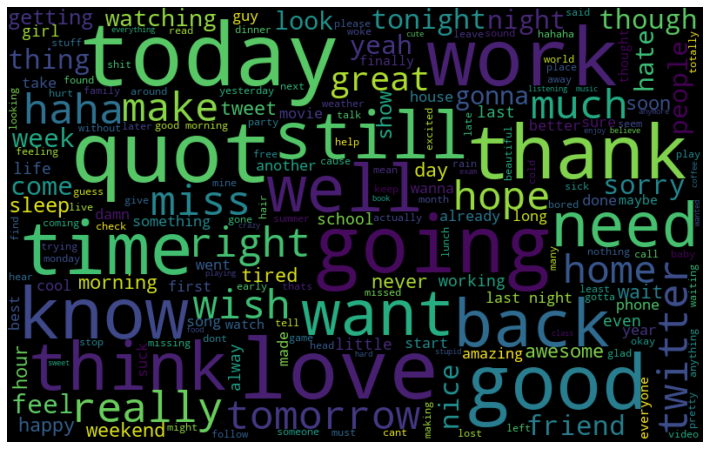

In [ ]:
# visualize the frequent words

all_words = " ".join([sentence for sentence in sample_data['tweet_text']])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

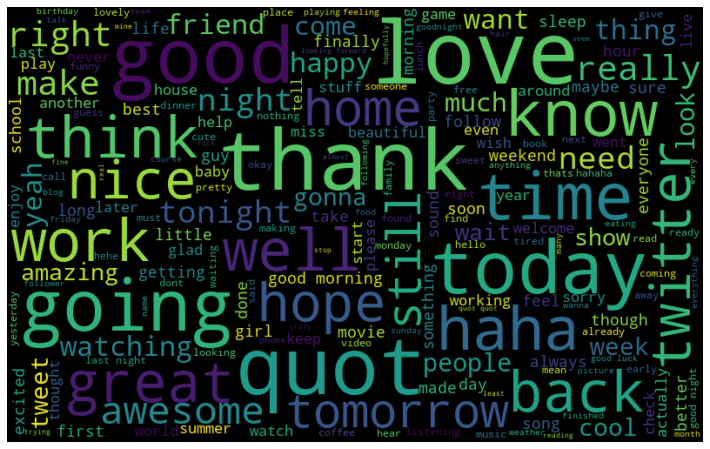

In [ ]:
# frequent words visualization for positive words

all_words = " ".join([sentence for sentence in sample_data['tweet_text'][sample_data['sentiment_label']==1]])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

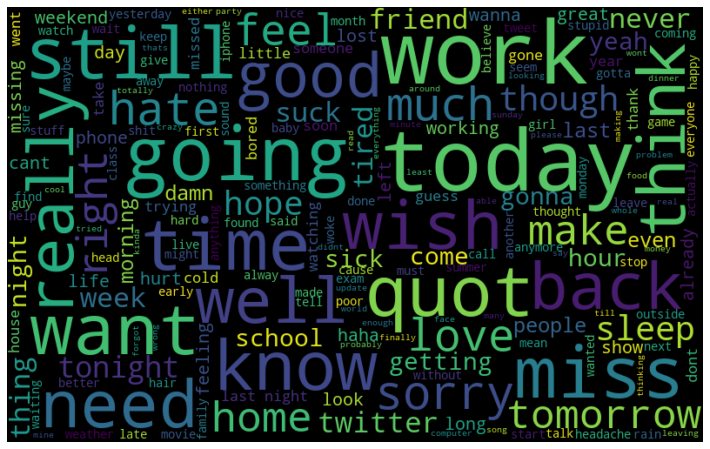

In [ ]:
# frequent words visualization for negative words

all_words = " ".join([sentence for sentence in sample_data['tweet_text'][sample_data['sentiment_label']==0]])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Data Preparation for Modeling

Code adapted from: https://www.kaggle.com/code/sudharshanravi/happy-or-sad-let-s-find-out

Code adapted from: https://towardsdatascience.com/a-beginners-guide-on-sentiment-analysis-with-rnn-9e100627c02e

Code adapted from: https://github.com/sepinouda/Machine-Learning/blob/main/Code%20-%20Lecture%205/Sentiment%20Analysis.ipynb


In [ ]:
sample_data.head()

,sentiment_label,tweet_text
0,1,dear happy friday already rice bowl lunch
1,1,ughh layin downn waiting zeina cook breakfast
6,1,side anything possible
10,1,video much better tube
14,1,ashleyltmsyf ashley hush hush hush hush video ...


In [ ]:
X = []
sentences = list(sample_data['tweet_text'])
for sen in sentences:
    X.append(sen)

In [ ]:
X[5]

'scratch enjoy seein people left college came back summer make chuckle'

In [ ]:
y = sample_data['sentiment_label']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
print("Train Data size:", len(X_train))
print("Test Data size", len(X_test))

Train Data size: 48000
Test Data size 12000


In [ ]:
## For building our Model
import tensorflow as tf

In [ ]:
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=5000)
#tokenizer = tf.keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(X_train)

X_train_tok = tokenizer.texts_to_sequences(X_train)
X_test_tok = tokenizer.texts_to_sequences(X_test)

In [ ]:
# Adding 1 because of reserved 0 index
vocab_size = len(tokenizer.word_index) + 1

max_words = 500

X_train_pad = tf.keras.preprocessing.sequence.pad_sequences(X_train_tok, maxlen=max_words)
X_test_pad = tf.keras.preprocessing.sequence.pad_sequences(X_test_tok, maxlen=max_words)

In [ ]:
print("\nVocabulary Size :", vocab_size)  
## Means there are these many unique words in the dataframe


Vocabulary Size : 27440


In [ ]:
## Vocabulary Preview(Indexed Dictionary):
### Viewing the first 10 indexes::
for i,(j,k) in enumerate(tokenizer.word_index.items()):
    print(j,"-------->",k)
    if i==10:
        break

good --------> 1
like --------> 2
quot --------> 3
today --------> 4
work --------> 5
love --------> 6
time --------> 7
going --------> 8
back --------> 9
know --------> 10
really --------> 11


In [ ]:
## understanding what "texts_to_sequences" means:
def check_(to_check):
    print(f"-------------ROW {to_check}:---------------")
    print(f"The Train data is: {X_train[to_check]}")
    print(f"The Vectorised Equivalent is: {X_train_tok[to_check]}\n")

check_(0)
check_(5)

-------------ROW 0:---------------
The Train data is: tweet often
The Vectorised Equivalent is: [68, 852]

-------------ROW 5:---------------
The Train data is: going postpone english assignment
The Vectorised Equivalent is: [8, 444, 1171]



## Machine Learning Model 1 - RNN

In [ ]:
from keras import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout

In [ ]:
embedding_size=32
model=Sequential()
model.add(Embedding(vocab_size, embedding_size, input_length=max_words))
model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid'))
print(model.summary())

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_11 (Embedding)    (None, 500, 32)           878080    
                                                                 
 lstm_9 (LSTM)               (None, 128)               82432     
                                                                 
 dense_10 (Dense)            (None, 1)                 129       
                                                                 
Total params: 960,641
Trainable params: 960,641
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
model.compile(loss='binary_crossentropy', 
             optimizer='adam', 
             metrics=['accuracy'])

In [ ]:
batch_size = 64
num_epochs = 5

history = model.fit(
    X_train_pad, 
    y_train, 
    batch_size=batch_size, 
    epochs=num_epochs,
    verbose=1,
    validation_data=(X_test_pad, y_test))

Epoch 1/5
750/750 [==============================] - 30s 38ms/step - loss: 0.6077 - accuracy: 0.6841 - val_loss: 0.5526 - val_accuracy: 0.7172
Epoch 2/5
750/750 [==============================] - 19s 26ms/step - loss: 0.5082 - accuracy: 0.7539 - val_loss: 0.5461 - val_accuracy: 0.7209
Epoch 3/5
750/750 [==============================] - 20s 27ms/step - loss: 0.4882 - accuracy: 0.7640 - val_loss: 0.5464 - val_accuracy: 0.7233
Epoch 4/5
750/750 [==============================] - 18s 24ms/step - loss: 0.4761 - accuracy: 0.7718 - val_loss: 0.5531 - val_accuracy: 0.7224
Epoch 5/5
750/750 [==============================] - 19s 25ms/step - loss: 0.4618 - accuracy: 0.7795 - val_loss: 0.5625 - val_accuracy: 0.7214


In [ ]:
scores = model.evaluate(X_test_pad, y_test, verbose=0)
print('Test accuracy:', scores[1])

Test accuracy: 0.7214166522026062


Visualizing Loss

In [ ]:
training_loss = history.history["loss"]
test_loss = history.history["val_loss"]
epoch_count = range(1, len(training_loss) + 1)

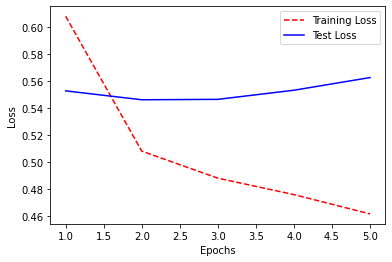

In [ ]:
plt.plot(epoch_count, training_loss, "r--")
plt.plot(epoch_count, test_loss, "b-")
plt.legend(["Training Loss", "Test Loss"])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

Visualizing Accuracy

In [ ]:
training_accuracy = history.history["accuracy"]
test_accuracy = history.history["val_accuracy"]
epoch_count = range(1, len(training_loss) + 1)

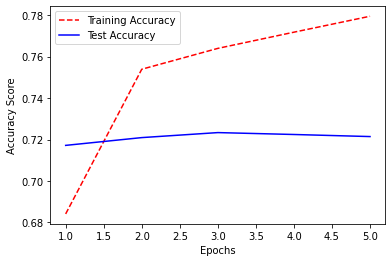

In [ ]:
plt.plot(epoch_count, training_accuracy, "r--")
plt.plot(epoch_count, test_accuracy, "b-")
plt.legend(["Training Accuracy", "Test Accuracy"])
plt.xlabel("Epochs")
plt.ylabel("Accuracy Score")
plt.show()

In [ ]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model

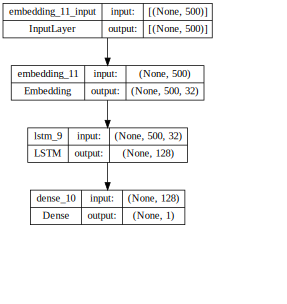

In [ ]:
SVG(model_to_dot(model, show_shapes=True).create(prog="dot", format="svg"))

## Machine Learning Model 2 - CNN

In [ ]:
from keras.layers import Flatten, Conv1D, LSTM
from keras.layers import GlobalMaxPooling1D

In [ ]:
model_2 = Sequential()

embedding_layer = Embedding(vocab_size, embedding_size, input_length=max_words)
model_2.add(embedding_layer)

model_2.add(Conv1D(128, 5, activation='relu'))
model_2.add(GlobalMaxPooling1D())
model_2.add(Dense(1, activation='sigmoid'))

In [ ]:
model_2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [ ]:
print(model_2.summary())

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_10 (Embedding)    (None, 500, 32)           878080    
                                                                 
 conv1d_1 (Conv1D)           (None, 496, 128)          20608     
                                                                 
 global_max_pooling1d (Globa  (None, 128)              0         
 lMaxPooling1D)                                                  
                                                                 
 dense_9 (Dense)             (None, 1)                 129       
                                                                 
Total params: 898,817
Trainable params: 898,817
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
batch_size = 64
num_epochs = 5

history_2 = model_2.fit(
    X_train_pad, 
    y_train, 
    batch_size=batch_size, 
    epochs=num_epochs,
    verbose=1,
    validation_data=(X_test_pad, y_test))

Epoch 1/5
750/750 [==============================] - 21s 20ms/step - loss: 0.5655 - acc: 0.7041 - val_loss: 0.5400 - val_acc: 0.7274
Epoch 2/5
750/750 [==============================] - 7s 9ms/step - loss: 0.4906 - acc: 0.7630 - val_loss: 0.5436 - val_acc: 0.7275
Epoch 3/5
750/750 [==============================] - 6s 9ms/step - loss: 0.4418 - acc: 0.7926 - val_loss: 0.5679 - val_acc: 0.7211
Epoch 4/5
750/750 [==============================] - 6s 8ms/step - loss: 0.3806 - acc: 0.8286 - val_loss: 0.6171 - val_acc: 0.7088
Epoch 5/5
750/750 [==============================] - 8s 11ms/step - loss: 0.3180 - acc: 0.8622 - val_loss: 0.6961 - val_acc: 0.6961


In [ ]:
scores = model_2.evaluate(X_test_pad, y_test, verbose=1)
print('Test accuracy:', scores[1])

375/375 [==============================] - 2s 4ms/step - loss: 0.6961 - acc: 0.6961
Test accuracy: 0.6960833072662354


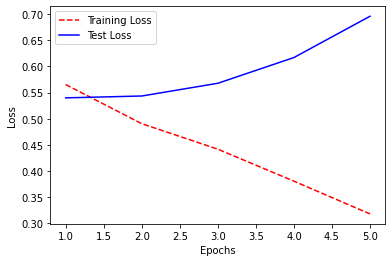

In [ ]:
training_loss = history_2.history["loss"]
test_loss = history_2.history["val_loss"]
epoch_count = range(1, len(training_loss) + 1)

plt.plot(epoch_count, training_loss, "r--")
plt.plot(epoch_count, test_loss, "b-")
plt.legend(["Training Loss", "Test Loss"])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

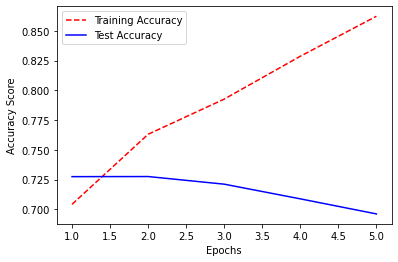

In [ ]:
training_accuracy = history_2.history["acc"]
test_accuracy = history_2.history["val_acc"]
epoch_count = range(1, len(training_loss) + 1)

plt.plot(epoch_count, training_accuracy, "r--")
plt.plot(epoch_count, test_accuracy, "b-")
plt.legend(["Training Accuracy", "Test Accuracy"])
plt.xlabel("Epochs")
plt.ylabel("Accuracy Score")
plt.show()

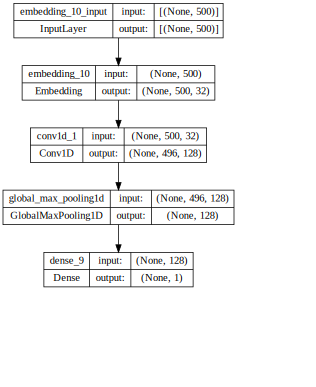

In [ ]:
SVG(model_to_dot(model_2, show_shapes=True).create(prog="dot", format="svg"))